<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%EA%B3%A0%EC%A0%84%EC%97%AD%ED%95%99_013b_animate_trojan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 고전역학

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
import matplotlib.animation as anim
from matplotlib.animation import PillowWriter

In [ ]:
import time

In [ ]:
# CSV 파일 첫부분에 있는 해시마크('#')로 시작하는 메타데이터를 읽어온다.
metadata = {} # an empty dictionary

fpath = '/content/py-trojan1.025vJ_rot.csv'

# read metadata in
with open(fpath, 'r') as f:
  for i, line in enumerate(f):
    if line.startswith('#'):
      if ':' in line:
        line = line.strip()
        key, value = line[1:].split(':',1)
        key = key.strip()
        value = value.strip()
        metadata[key] = value
    else:
      data_starts_at = i
      break

print(metadata)

# CSV 파일에서 해시마크('#')로 시작하는 메타데이터 줄을 무시하고 주 데이타를 읽는다.
df = pd.read_csv(fpath, sep=',', comment='#', header=0)
f.close()

{'Simulation Name': 'Trojan asteroid', 'FrameType': 'rotating', 'vT/vJ': '1.025'}


In [ ]:
# 메타데이타에서 시뮬레이션 파라미터를 읽어 낸다.
frametype = metadata["FrameType"]
vTvJ = eval(metadata["vT/vJ"])
vTvJ

1.025

In [ ]:
frametype

'rotating'

In [ ]:
df

,t,xS,yS,xJ,yJ,xT,yT
0,0.000000e+00,-7.387597e+08,-3.385104e-14,7.772612e+11,-3.385104e-14,3.882612e+11,6.737678e+11
1,3.000000e+05,-7.387598e+08,4.656613e-10,7.772613e+11,9.536743e-07,3.881766e+11,6.738172e+11
2,6.000000e+05,-7.387598e+08,1.862645e-09,7.772613e+11,0.000000e+00,3.880925e+11,6.738675e+11
3,9.000000e+05,-7.387598e+08,5.587935e-09,7.772613e+11,0.000000e+00,3.880089e+11,6.739187e+11
4,1.200000e+06,-7.387599e+08,3.725290e-09,7.772614e+11,0.000000e+00,3.879258e+11,6.739708e+11
...,...,...,...,...,...,...,...
99996,2.999880e+10,-7.387801e+08,5.498052e-03,7.772827e+11,5.493164e-03,5.452036e+11,-3.884125e+11
99997,2.999910e+10,-7.387810e+08,5.487084e-03,7.772836e+11,5.462646e-03,5.456816e+11,-3.875304e+11
99998,2.999940e+10,-7.387820e+08,5.475968e-03,7.772846e+11,5.462646e-03,5.461608e+11,-3.866476e+11
99999,2.999970e+10,-7.387829e+08,5.464733e-03,7.772856e+11,5.493164e-03,5.466410e+11,-3.857641e+11


In [ ]:
ts = np.array(df["t"])

In [ ]:
n = len(ts)
n

100001

In [ ]:
tbound = ts[-1]
tbound

np.float64(30000000000.0)

In [ ]:
xA = np.array(df["xS"])
yA = np.array(df["yS"])

xB = np.array(df["xJ"])
yB = np.array(df["yJ"])

xC = np.array(df["xT"])
yC = np.array(df["yT"])

In [ ]:
type(xA)

numpy.ndarray

In [ ]:
sr = 100  # sampling rate

tss = ts[::sr]
xAs = xA[::sr]
yAs = yA[::sr]
xBs = xB[::sr]
yBs = yB[::sr]
xCs = xC[::sr]
yCs = yC[::sr]

Ns = len(tss)

In [ ]:
Ns

1001

In [ ]:
type(tss)

numpy.ndarray

In [ ]:
day = 24 * 60 * 60
year = 365.2422 * day
km = 1000 # 1 km = 1000 m
k = 50 # tail length in sim. steps
maxnumframe = n // sr

def frame(n):
  # 화면 초기화: 이전 프레임 그림 청소
  ax.cla()
  nstart = np.max([0, n-k])

  # 플로팅 영역 고정
  ax.set_xlim([-1.1e9, 1.1e9])
  ax.set_ylim([-1.1e9, 1.1e9])

  # 제목 행: 파라미터 및 시간 정보 표시
  framestr = "Rotating" if frametype=="rotating" else "Inertial"
  ax.set_title(f'Trojan object, {framestr} coords. [v0 = {vTvJ}vJ]: @ {tss[n]/year:.1f} Yrs.')

  # 격자선
  ax.grid()

  # 전체 궤적
  ax.plot(xCs[:n+1]/km, yCs[:n+1]/km, \
          color = 'blue', alpha=0.2)

  # 최근 궤적
  ax.plot(xCs[nstart:n+1]/km, yCs[nstart:n+1]/km, \
          color = 'blue', alpha=0.5)

  # 천체의 현 위치
  ax.plot(xAs[n]/km, yAs[n]/km, color = 'red', marker='o', label="Sun")
  ax.plot(xBs[n]/km, yBs[n]/km, color = 'darkgreen', marker='o', label="Jupiter")
  ax.plot(xCs[n]/km, yCs[n]/km, color = 'blue', marker='o', label="Trojan")

  # 축 라벨
  ax.set_xlabel('x [km]', fontsize = 14)
  ax.set_ylabel('y [km]', fontsize = 14)

  # 범례
  ax.legend()

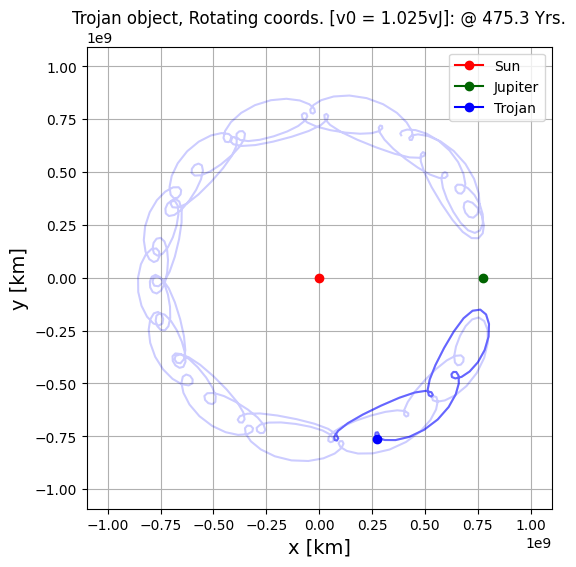

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.axis("equal")
frame(500)

In [ ]:
maxnumframe

1000

Saving GIF file...
GIF file saved to troj-1.025vJ-rotating.gif.
8.20 s


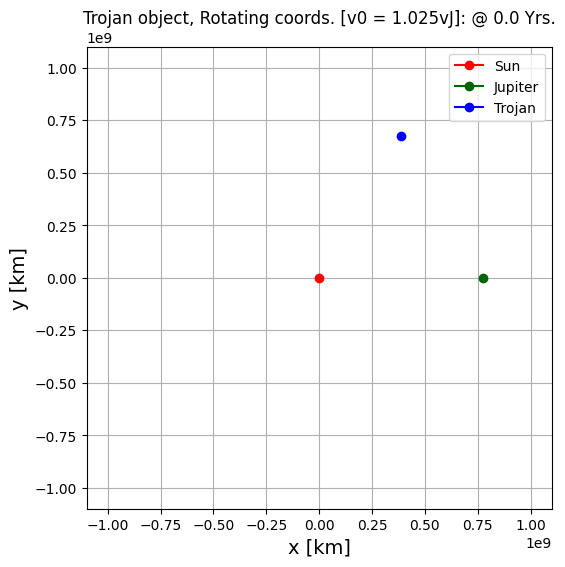

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ani = anim.FuncAnimation(fig, frame, frames=50, interval=100)
fname = f'troj-{vTvJ}vJ-{frametype:s}.gif'

# save animation as moving GIF file
print("Saving GIF file...")
start_time = time.time()
ani.save(fname, writer='pillow');
end_time = time.time()
print(f"GIF file saved to {fname}.")
print(f"{end_time - start_time:.2f} s")

In [ ]:
# save as AVI file
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ani = anim.FuncAnimation(fig, frame, frames=maxnumframe, interval=100)
fname = f'troj-{vTvJ}vJ-{frametype:s}.avi'

print("Saving AVI file...")
start_time = time.time()
ani.save(fname)
end_time = time.time()
print(f"AVI file saved to {fname}.")
print(f"{end_time - start_time:.2f} s")